# Visualizing Datasets 

There are several tools that allow us to visualize the data on a map. In this notebook, we will be working with **Folium**, a Python library for visualizing geospatial data on an interactive leaflet map.

Folium enables us to generate a base map of specified width and height with either default map styles or customed ones. Among the default map styles available with Folium, we have OpenStreetMap, Mapbox, CartoDB (incl. positron and dark_matter), etc.

## Table of contents

* [Needed packages](#chapter1)
* [Importing data from CKAN](#chapter2)
* [Display a blank Folium map](#chapter3)
* [Layers and Tiles in Folium](#chapter4)
* [Plotting Markers on a map](#chapter5)
     * [Adding a single Marker to a Folium map](#section_5_1)
     * [Changing the parameters of a Marker](#section_5_2)
     * [Adding multiple Markers to a Folium map](#section_5_3)
* [HeatMap](#chapter6)
* [What's next?](#chapter7)

## Needed packages <a class="anchor" id="chapter1"></a>

Installing Python packages in Anaconda is a simple process that can be done through various methods, such as using the conda command, pip, or the Anaconda Navigator. For more details about these methods, please refer to [this tutorial.](https://www.tutorialspoint.com/how-do-i-install-python-packages-in-anaconda)

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

## Importing and visualizing data from CKAN <a class="anchor" id="chapter2"></a>

In this tutorial, we will be working on data provided by the BikeMi service of Milan, Italy. This dataset supplies location, characteristics and number of stalls offered of the BikeMI Bike Sharing stations.

To retrieve the needed dataset, we first access our CKAN portal. once we get there, we click on the "Organizations" tab. Since we are dealing with the municipality of Milan, we search for italian/milanese organizations. In our Example, we will focus on datasets available in the 'Commune di Milano' organization.

As we are interested in data related to bike sharing, we search for key words that match our needs. For example, the words 'bike', 'BikeMi', and so on.

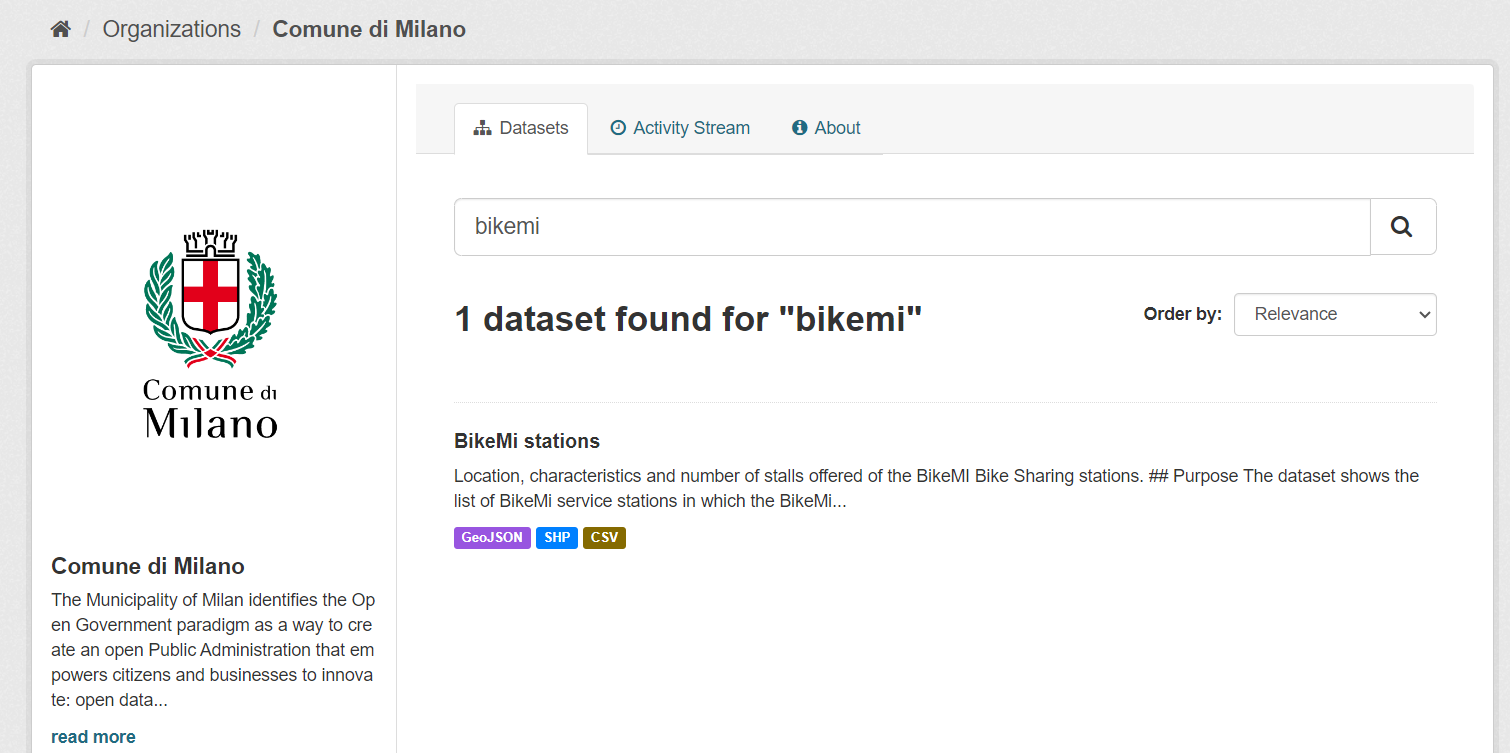

In our example, we select the first (and only) source, which contains three different datasets, all in diffrent formats: GeoJSON, SHP and CSV.

When we click on the first datast (the GeoJSON one), we get additional information about the resource, including the url that will allow us to access our data. We will then copy this URL, access it and store the information it contains using **geoandas**, which extends the datatypes used by **Pandas**, a Python library for data analysis, to allow spatial operations on geometric types.

In [3]:
# URL of the dataset
URL = 'https://dati.comune.milano.it/dataset/cc065002-cd21-4dcb-b84f-bba2fd9e0c86/resource/2d0bafbc-1739-4a14-9e5a-71a648e1fc5b/download/bikemi_stazioni.geojson'

In [8]:
# Data extraction and storage in a DataFrame
try:
    df= gpd.read_file(URL)
except Exception as e:
    print('Sorry, could not handle the json file. Error : ' + str(e))

In [9]:
# Presentation of the first five rows of the DataFrame
df.head()

,id_amat,stato,numero,nome,tipo,stalli,sede,id_via,indirizzo,civico,zd_attuale,anno,geometry
0,1,attiva,001,Duomo,Monofacciale,24,Carreggiata,1,PIAZZA DEL DUOMO,NaN,1,2008,POINT (9.18914 45.46475)
1,3,attiva,402,San Babila Bis,Monofacciale,24,Marciapiede,216,PIAZZA SAN BABILA,NaN,1,2008,POINT (9.19725 45.46627)
2,4,attiva,003,Cadorna 1,Monofacciale,21,Marciapiede,601,PIAZZALE LUIGI CADORNA,NaN,1,2008,POINT (9.17566 45.46800)
3,5,attiva,004,Lanza,Monofacciale,24,Marciapiede,726,LARGO ANTONIO GREPPI,NaN,1,2008,POINT (9.18197 45.47227)
4,6,attiva,005,Universita' Cattolica,Monofacciale,24,Marciapiede,643,PIAZZA SANT'AMBROGIO,NaN,1,2008,POINT (9.17641 45.46312)


 Dataset fields :
 
 - **id_amat:** Unique numerical identifier of the station 
 - **stato:** Current status of the station 
 - **numero:** BikeMI station number 
 - **nome:** Station name 
 - **tipo**: Type of installation (Single-sided, Double-sided) 
 - **sede:** Number of stalls 
 - **id_via:** Location of the station (Roadway, Sidewalk) 
 - **id_via:** Code of the street where the station is located 
 - **indirizzo:** Address 
 - **civic:** Civic number 
 - **zd_attuale:** Decentralization area/Municipality 
 - **anno:** Year of realization 
 - **geometry:** Point geometry This dataset was released by the municipality of Milan

## Display a blank Folium map <a class="anchor" id="chapter3"></a>

To display a basic map with Folium we need to call upon folium.map() . Within that class method we can pass in a number of arguments:

- location: The position where the map will be centred upon


- zoom_start: The initial zoom level of the map


- control_scale: Whether the scale controls are displayed on the map

There are a number of other parameters we can use. If you want to find out more, check out the help documentation on the folium.map class.

In [11]:
# Create a Map instance
m = folium.Map(location=[45.4641943, 9.1896346], zoom_start=10, control_scale=True)

m

We can resize our map by using the branca library in Python. It is a spinoff from Folium that hosts the non-map specific features. We can use its Figure class for resizing our maps and pass the desired width and height in pixels:

In [12]:
from branca.element import Figure
fig=Figure(width=550,height=350)

We can also change the zoom level. The starting zoom level is fixed to 10 (the map is plotted with a 10x zoom). By default, we can zoom in and out as much as we want, but that may be a problem if we want to plot a map of a small area. therefore, we need to mention the appropriate starting zoom level so that the map focuses only on that region.

Also, if we don’t want them to zoom in or out much and lose focus on the map, then we can restrict it. For doing this, Folium gives us three parameters – zoom_start, min_zoom, and max_zoom.

So, let us again plot the map of Milan but this time of fixed size and with a restricted zoom level:

In [13]:
m1=folium.Map(width=550,height=350,location=[45.4641943, 9.1896346],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(m1)
m1

## Layers and Tiles in Folium <a class="anchor" id="chapter4"></a>

A tileset is a collection of raster and vector data broken up into a uniform grid of square tiles. Each tileset has a different way of representing data in the map. Folium allows us to create maps with different tiles like Stamen Terrain, Stamen Toner, Stamen Water Color, CartoDB Positron, and many more. By default, the tiles are set to OpenStreetMap.

Each tileset shows different features of a map and is suitable for different purposes. For example, Stamen Terrain features hill shading and natural vegetation colors. It showcases advanced labeling and linework generalization of dual-carriageway roads. And, CartoDB Dark Matter shows the CartoDB Positron map in dark mode.

Since now we know that each tileset provides information in a different way and serves a different purpose, we can layer them over one another to get more information by just plotting a single map. We can do this by adding different layers of tiles to a single map:

In [14]:
fig2=Figure(width=550,height=350)
m2=folium.Map(location=[45.4641943, 9.1896346])
fig2.add_child(m2)
folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)
m2

## Plotting Markers on a Map <a class="anchor" id="chapter5"></a>

### Adding a single Marker to a Folium map  <a class="anchor" id="section_5_1"></a>

We can add a marker to our map by calling upon folium.Marker and passing in the location of the point. In this example we will display the first BikMi station of our dataset.

To make it appear on the map, we need to apply the .add_to() function and pass in our map object.

In [15]:
# Add marker
folium.Marker(
    location=[45.46475, 9.18914],
    popup='Duomo',
    icon=folium.Icon(color='green', icon='ok-sign'),
).add_to(m)

#Show map
m

### Changing the parameters of a Marker <a class="anchor" id="section_5_2"></a>

We can hange the color of our markers by calling upon the icon argument within the Marker method. We can also remove any symbols within the Folium marker by setting the icon argument to a blank string:

In [16]:
folium.Marker(location=[45.46475, 9.18914], icon=folium.Icon(color='red', icon='')).add_to(m)
m

### Adding multiple Markers to a Folium map <a class="anchor" id="section_5_3"></a>

We could continue adding markers one by one, which may be fine for a small dataset. But when you have a dataset like this one with over 2,000 rows we need to consider an alternative approach.

In [17]:
# Convert points to GeoJSON
points_gjson = folium.features.GeoJson(df, name="BikMi stations")

In [18]:
# Create a Map instance
m = folium.Map(location=[45.4641943, 9.1896346], tiles = 'cartodbpositron', zoom_start=13.5, control_scale=True)

# Add points to the map instance
points_gjson.add_to(m)

# Alternative syntax for adding points to the map instance
#m.add_child(points_gjson)

#Show map
m

## HeatMap <a class="anchor" id="chapter6"></a>

Folium plugins allow us to use popular plugins available in leaflet. One of these plugins is HeatMap, which creates a heatmap layer from input points.

Let’s visualize a heatmap of the BikeMi stations in Milan using the addresses input data. folium.plugins.HeatMap requires a list of points, or a numpy array as input, so we need to first manipulate the data a bit:

In [19]:
# Get x and y coordinates for each point
df["x"] = df["geometry"].apply(lambda geom: geom.x)
df["y"] = df["geometry"].apply(lambda geom: geom.y)

# Create a list of coordinate pairs
locations = list(zip(df["y"], df["x"]))


In [20]:
from folium.plugins import HeatMap

# Create a Map instance
m = folium.Map(location=[45.4641943, 9.1896346], tiles = 'stamentoner', zoom_start=10, control_scale=True)

# Add heatmap to map instance
# Available parameters: HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=15, gradient=None, overlay=True, control=True, show=True)
HeatMap(locations).add_to(m)

# Alternative syntax:
#m.add_child(HeatMap(points_array, radius=15))

# Show map
m

## What's next? <a class="anchor" id="chapter7"></a>

If you want to have more use cases on how to implement the different functionalities of the Folium library, I strongly recommand [this tutorial.](https://www.analyticsvidhya.com/blog/2020/06/guide-geospatial-analysis-folium-python/#h-installing-folium-on-our-machine)